In [2]:
from IPython.display import Image

<img src="/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png" width="400px" height="400px">

In [3]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1=pd.read_csv("/content/dreaddit-train.csv")

In [5]:
df3=pd.read_csv("/content/dreaddit-test.csv")

In [6]:
df1.shape

(2838, 116)

In [7]:
df3.shape

(715, 116)

In [8]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1247,assistance,9vdpf2,"[0, 5]",My mother has stage 4 bile duct cancer and it ...,1186,1,0.8,1541709528,18,2.059434,...,1.0,1.1818,1.0,1.69373,1.46744,1.87154,0.82,14,3.940113,-0.035714


In [9]:
df3.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
360,1500,relationships,7np78v,"[10, 15]",I'm afraid that I could also give her those sn...,1,1.0,1.514926e+09,4,2.165761,...,1.0,1.0,1.0,1.68443,1.35128,1.87139,0.75,7,3.273596,-0.036364


In [12]:
# We merged the two files. We have completed the missing data.
df = pd.concat([df1, df3], ignore_index=True)  # New way using pd.concat

In [13]:
df.shape

(3553, 116)

In [14]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [15]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.1+ MB


In [17]:
df.isnull().sum()

,0
subreddit,0
post_id,0
sentence_range,0
text,0
id,0
...,...
lex_dal_avg_pleasantness,0
social_upvote_ratio,0
social_num_comments,0
syntax_fk_grade,0


In [18]:
from textblob import TextBlob

In [19]:
TextBlob("the best").polarity #We find the positive or negative of the words.

1.0

In [20]:
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [21]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
df2=df[["text"]]

In [23]:
df2.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [24]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [25]:
df2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [26]:
df2.sentiment.value_counts()

,count
sentiment,
0.000000,84
0.250000,24
0.100000,23
0.150000,17
0.125000,16
...,...
0.200926,1
-0.009375,1
-0.045833,1


In [27]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stopwords = set(stopwords.words("english"))

In [31]:
#we clean up unnecessary marks
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df2["text"] = df2["text"].apply(clean)

In [32]:
df2["text"]

,text
0,said felt way sugget go rest trigger ahead you...
1,hey rassist sure right place post goe im curr...
2,mom hit newspap shock would know dont like pla...
3,met new boyfriend amaz kind sweet good student...
4,octob domest violenc awar month domest violenc...
...,...
3548,horribl vivid nightmar everi night sometim the...
3549,also cant think without get angri jealous talk...
3550,furthermor told got realli serious anxieti dep...
3551,here link amazon wish list two item link does...


In [34]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    mask=np.array(Image.open('Stress.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [60]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    mask=np.array(Image.open('Stress.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    # Convert all elements of data to strings before joining
    wc.generate(' '.join(str(x) for x in data))
    plt.imshow(wc)
    plt.axis("off")

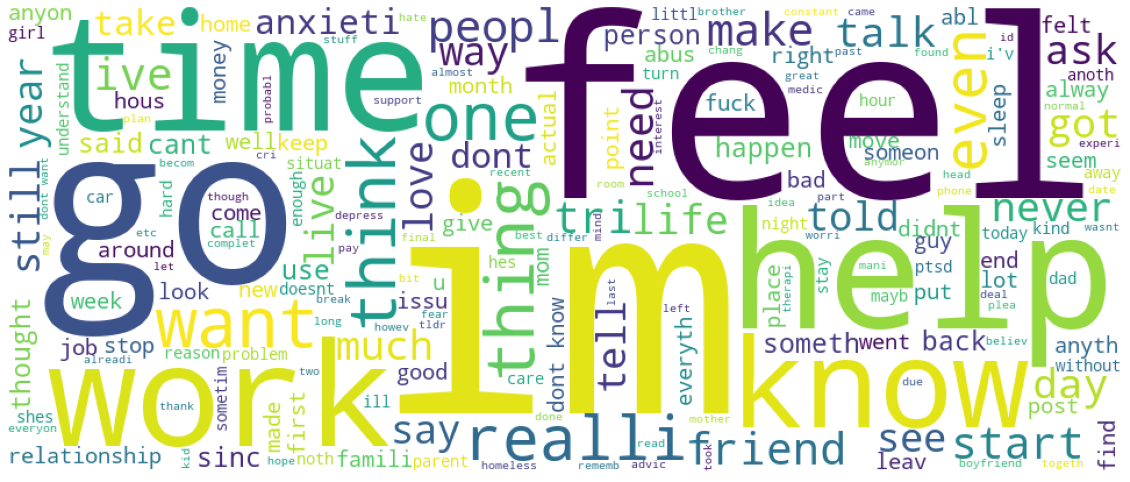

In [ ]:
wc(df2.text,'white')

In [35]:
df2["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df2=df2[["text", "label"]]

In [36]:
df2.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [37]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [38]:
df2.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [39]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

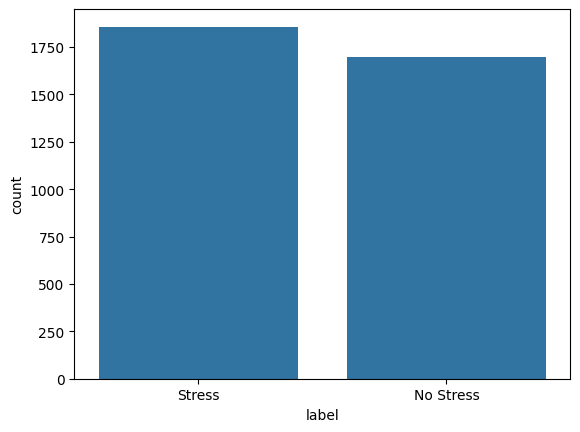

In [40]:
sns.countplot(x=df2.label)

In [41]:
x=df2.text
y=df2.label

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [43]:
vect=CountVectorizer(stop_words="english")

In [44]:
x=vect.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [46]:
mb=MultinomialNB()

In [47]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [48]:
accuracy_score(tahmin,y_test)

0.7401574803149606

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
d=DecisionTreeClassifier()

In [51]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
tahmin1=d.predict(x_test)

In [53]:
accuracy_score(y_test,tahmin1)

0.6355455568053994

In [54]:
user="Sometime I feel like I need some help"


In [56]:
df2=vect.transform([user]).toarray()
output=d.predict(df2)
print(output)

['Stress']
